# Prediction using Decision Tree Algorithm

### Author - Arkadeepto Majumder
### Classification of flowers based on their features

In [12]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

# Data import

In [13]:
data=pd.read_csv('data/Iris.csv',index_col=0)
data.head()
target= data["Species"]

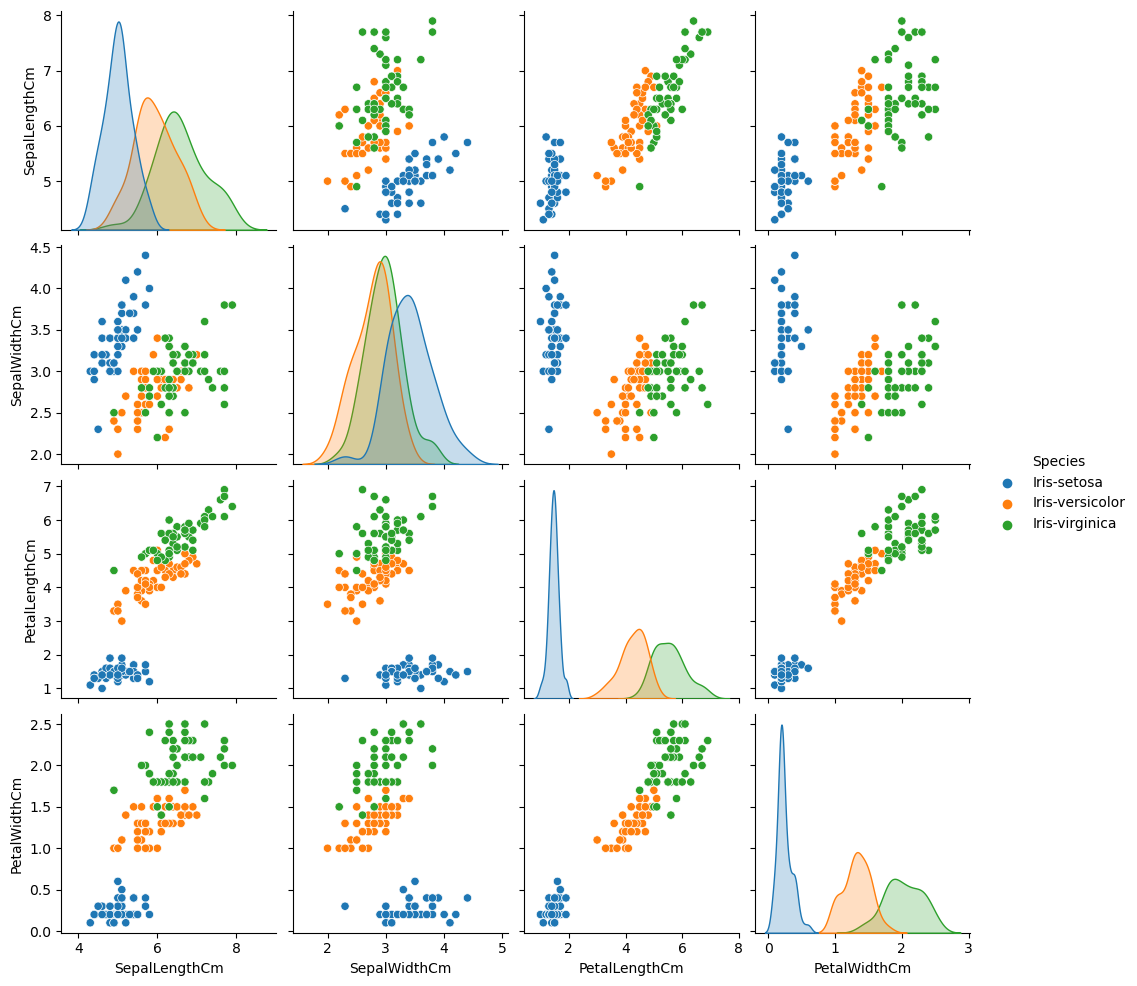

In [14]:
sns.pairplot(data, hue='Species')

# Data preprocessing and model fitting

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

df=data.copy()
df=df.drop('Species', axis=1)
df.shape

X=data.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
y=data['Species'].values
data.shape

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=DecisionTreeClassifier()
model.fit(X_train,y_train);

print("Model successfully trained")

Model successfully trained


# Classification report and evaluation

In [16]:
y_pred=model.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


# Visualisation of the Decision Tree

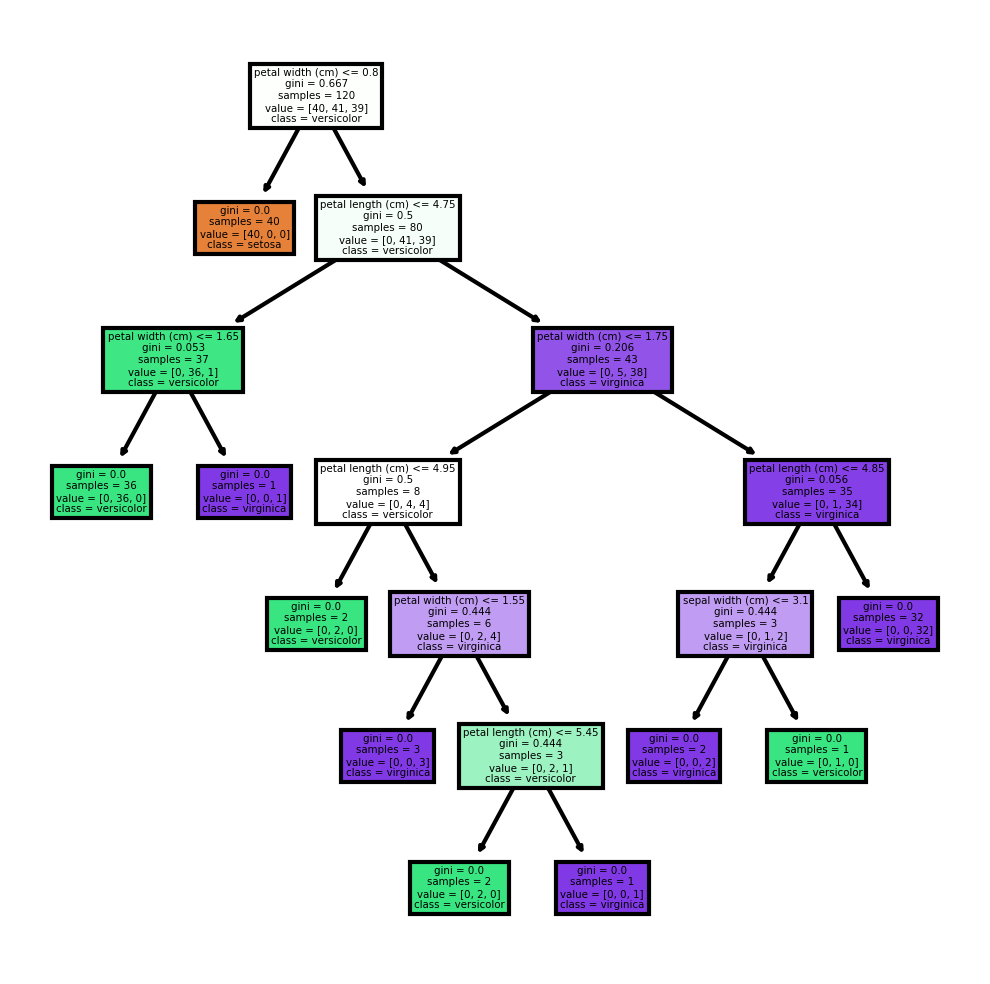

In [17]:
from sklearn.tree import plot_tree

features=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
class_names=['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(model,
           feature_names = features, 
           class_names=class_names,
           filled = True);